# Naive Bayes

## Carregando Biblioteca

In [1]:
import pandas as pd
import numpy as np
#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
#Pré-processamento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
#Dados de Treino
from sklearn import datasets
from sklearn.model_selection import train_test_split
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## Carregando os dados

In [3]:
df = pd.read_csv("../datasets/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pré-Processamento de Dados

In [4]:
def pronomes(x):
    if 'Mr' in x:
        return 'Mr'
    elif 'Don' in x:
        return 'Mr'
    elif 'Mrs' in x:
        return 'Mrs'
    elif 'Ms' in x:
        return 'Mrs'
    elif 'Mme' in x:
        return 'Mrs'
    elif 'Miss' in x:
        return 'Miss'
    elif 'Mlle' in x:
        return 'Miss'
    elif 'Dr' in x:
        return 'Dr'
    elif 'Rev' in x:
        return 'Rev'
    elif 'Master' in x:
        return 'Master'
    elif 'Major' in x:
        return 'Major'
    elif 'Capt' in x:
        return 'Capt'
    elif 'Jonkheer' in x:
        return 'Mr'
    elif 'Col' in x:
        return 'Col'
    elif 'Countess' in x:
        return 'Mrs'
    else:
        return 'None'
# Extração de Pronomes
df['Name'] = df['Name'].apply(pronomes)

# Categóricas para Numéricas
le_name = LabelEncoder()
df['Name']  = le_name.fit_transform(df['Name'])

# Substituir valores ausentes/nulos
df['Age'].fillna(df['Age'].mean(), inplace = True)
df.loc[df['Embarked'].isna(), ['Embarked']] = df['Embarked'].value_counts().index[0]

# Categórico Para numérico
le_sex = LabelEncoder()
df['Sex']  = le_sex.fit_transform(df['Sex'])
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# Remoção de colunas
df = df.drop(columns=['PassengerId', 'Ticket', 'Cabin'])

#Escalonamento 
df[['Age', 'Fare']] = pd.DataFrame( scale(df[['Age', 'Fare']]),
                                    index = df.index,
                                    columns = ['Age', 'Fare'])

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,6,1,-0.592481,1,0,-0.502445,2
1,1,1,6,0,0.638789,1,0,0.786845,0
2,1,3,5,0,-0.284663,0,0,-0.488854,2
3,1,1,6,0,0.407926,1,0,0.420730,2
4,0,3,6,1,0.407926,0,0,-0.486337,2


## Dados de Treino e Teste

In [5]:
x = df.drop(columns='Survived')
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Gaussian Naive Bayes (GaussianNB)

- **class_count_** - O número de amostras de treinamento observadas em cada classe
- **class_prior_** - As probabilidades de cada classe
- **classes_** - Os rótulos de classe conhecidos pelo classificador
- **epsilon_** - O valor aditivo absoluto para variâncias
- **sigma_** - A variação de cada recurso por classe
- **theta_** - A média de cada recurso por classe
- O metodo **fit()** é usado para treinar o modelo
- O método **predict()** é usado para prever um dado

In [6]:
classificador = GaussianNB()
classificador.fit(x_train, y_train)

print("\nnúmero de amostras de treinamento observadas em cada classe:\n", classificador.class_count_)
print("\nprobabilidade de cada classe:\n", classificador.class_prior_)
print("\nrótulos de classe conhecidos pelo classificador:\n", classificador.classes_)
print("\nvalor aditivo absoluto para variâncias:\n",  classificador.epsilon_)
print("\nvariação de cada recurso por classe: \n", classificador.sigma_)
print("\nmédia de cada recurso por classe: \n", classificador.theta_)


número de amostras de treinamento observadas em cada classe:
 [439. 273.]

probabilidade de cada classe:
 [0.61657303 0.38342697]

rótulos de classe conhecidos pelo classificador:
 [0 1]

valor aditivo absoluto para variâncias:
 1.2996918791819215e-09

variação de cada recurso por classe: 
 [[0.5501113  0.39933375 0.12291344 0.93810008 1.79382631 0.69345842
  0.4093016  0.50891185]
 [0.74703807 0.55487126 0.21972655 1.11179165 0.49760496 0.63038549
  1.85573392 0.73874599]]

média de cada recurso por classe: 
 [[ 2.523918    5.81093394  0.85649203  0.07560458  0.57175399  0.33940774
  -0.18956639  1.63781321]
 [ 1.98534799  5.44688645  0.32600733 -0.11416197  0.46153846  0.47619048
   0.28691356  1.4029304 ]]


## Prever um valor

In [7]:
data = {
    'Pclass': [1],
    'Name': ['Miss'],
    'Sex': ['female'],
    'Age': [5],
    'SibSp': [1],
    'Parch': [1],
    'Fare': [50],
    'Embarked': ['C']
}

#Transformando do Dicionário em DataFrame
data = pd.DataFrame(data)

#Tratando os Dados
# Categóricas para Numéricas

data['Name']  = le_name.transform(data['Name'])
data['Sex']  = le_sex.transform(data['Sex'])
data['Embarked'] = le_embarked.transform(data['Embarked'])
data[['Age', 'Fare']] = pd.DataFrame( scale(data[['Age', 'Fare']]),
                                    index = data.index,
                                    columns = ['Age', 'Fare'])

#Classificando
previsao = classificador.predict(data)
print("\nPrevendo o dataframe criado: ", previsao)


Prevendo o dataframe criado:  [1]


## Prever os dados de Teste

In [8]:
previsao = classificador.predict(x_test)

acuracia = 100 * np.sum(previsao == y_test)/ len(y_test)

print("Acurácia {}%".format(acuracia))

Acurácia 80.44692737430168%


# Matriz de Confusão

- A biblioteca **sklearn.metrics** tem a função **confusion_matrix** que irá nos retornar a matriz de confusão dos dados previstos. 
- **y_true** - Valores alvo verdadeiros (corretos). 
- **y_pred** - Alvos estimados conforme retornados por um classificador. 
- **labels** - Lista de rótulos para indexar a matriz. Isso pode ser usado para reordenar ou selecionar um subconjunto de rótulos. Se Nenhum for fornecido, aqueles que aparecem pelo menos uma vez em y_true ou y_pred são usados na ordem de classificação 
- **sample_weight** - Pesos de amostra. 
- **normalize**: {‘true’, ‘pred’, ‘all’}, default=None - Normaliza a matriz de confusão sobre as condições verdadeiras (linhas), preditas (colunas) ou toda a população. Se nenhum, a matriz de confusão não será normalizada. 

In [9]:
confusion_matrix(y_test, previsao)

array([[89, 21],
       [14, 55]], dtype=int64)

## Personalizando a matriz de confusão

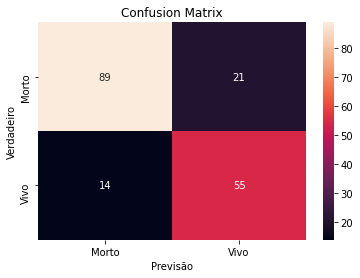

In [10]:
cm = confusion_matrix(y_test, previsao)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Previsão');
ax.set_ylabel('Verdadeiro'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Morto', 'Vivo']);
ax.yaxis.set_ticklabels(['Morto', 'Vivo']);

# Métricas

- A biblioteca **sklearn.metrics** tem a função **classification_report** que cria um relatório de texto mostrando as principais métricas de classificação. 
- **y_true** - Valores alvo verdadeiros (corretos). 
- **y_pred** - Alvos estimados conforme retornados por um classificador. 
- **labels** - Lista opcional de índices de rótulo a serem incluídos no relatório. 
- **target_names** - Nomes de exibição opcionais que correspondem aos rótulos (mesma ordem) 
- **sample_weight** - Peso das Amostras
- **digits** - Número de dígitos para formatar valores de ponto flutuante de saída. Quando output_dict for True, isso será ignorado e os valores retornados não serão arredondados.
- **output_dict** - Se verdadeiro, retorna a saída como dict
- **zero_division**: 'warn', 0 or 1, default='warn' - Define o valor a ser retornado quando houver uma divisão zero. Se definido como “aviso”, funciona como 0, mas os avisos também são gerados. 

In [11]:
print(classification_report(y_test, previsao, target_names = ['Morto', 'Vivo']))

              precision    recall  f1-score   support

       Morto       0.86      0.81      0.84       110
        Vivo       0.72      0.80      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



## Acurácia

- A função **accuracy_score** pode ser usada para verificar a acurácia dos dados

In [12]:
accuracy_score(y_test, previsao)

0.8044692737430168

# Validação Cruzada

- A função **cross_val_score** realiza a validação cruzada.
- **estimator** - O objeto a ser usado para ajustar os dados (classificador).
- **X** - array-like of shape (n_samples, n_features) -   Os dados para caber. Pode ser, por exemplo, uma lista ou um array.
- **y** - array-like of shape (n_samples,) or (n_samples, n_outputs), default=None - A variável alvo a tentar prever no caso de aprendizagem supervisionada.
- **group** - array-like of shape (n_samples,), default = None -      Rótulos de grupo para as amostras usadas durante a divisão do conjunto de dados em conjunto de treinamento / teste. Usado apenas em conjunto com uma instância cv "Grupo" (por exemplo, GroupKFold).
- **scoring** - str ou callable, default = None - Um str (consulte a documentação de avaliação do modelo) ou um objeto / função que pode ser chamado de scorer com scorer de assinatura (estimador, X, y) que deve retornar apenas um único valor. Semelhante a cross_validate, mas apenas uma única métrica é permitida.  Se Nenhum, o marcador padrão do estimador (se disponível) é usado.
- **cv** - int, gerador de validação cruzada ou iterável, padrão = None -      Determina a estratégia de divisão de validação cruzada. As entradas possíveis para cv são:
    - Nenhum, para usar a validação cruzada de 5 vezes padrão,
    - int, para especificar o número de dobras em um KFold (estratificado),         - Divisor de CV,
    - Um rendimento iterável (treinar, testar) se divide como matrizes de índices.
    - Para entradas int / Nenhum, se o estimador for um classificador ey for binário ou multiclasse, StratifiedKFold é usado. Em todos os outros casos, o KFold é usado. Esses divisores são instanciados com shuffle = False para que as divisões sejam iguais nas chamadas.
    
- **n_jobs** - int, default = None - Número de trabalhos a serem executados em paralelo. O treinamento do estimador e o cálculo da pontuação são paralelizados nas divisões de validação cruzada. Nenhum significa 1, a menos que em um contexto joblib.parallel_backend. -1 significa usar todos os processadores. 
- **verbose** - int, default = 0 - O nível de verbosidade.
- **fit_params** - dict, default = None - Parâmetros para passar para o método de ajuste do estimador (classificador).
- **pre_dispatch** - int ou str, default = ’2 * n_jobs’ - Controla o número de trabalhos que são despachados durante a execução paralela. Reduzir esse número pode ser útil para evitar uma explosão de consumo de memória quando mais tarefas são despachadas do que as CPUs podem processar. Este parâmetro pode ser:
    - Nenhum, caso em que todos os empregos são imediatamente criados e reproduzidos. Use isso para trabalhos leves e de execução rápida, para evitar atrasos devido à geração sob demanda dos trabalhos
    - Um int, dando o número exato de empregos totais que são gerados
    -  Um str, dando uma expressão em função de n_jobs, como em ‘2 * n_jobs’
- **error_score** - raise ou numérico, default = np.nan -  Valor a ser atribuído à pontuação se ocorrer um erro no ajuste do estimador. Se definido como ‘aumentar’, o erro é gerado. Se um valor numérico for fornecido, FitFailedWarning é gerado 


In [13]:
x = df.drop(columns='Survived')
y = df['Survived']
scores = cross_val_score(classificador, x, y, cv = 5)

print("Acurracy: %0.2f (+\-) %0.2f " % (scores.mean(), scores.std() * 2))

Acurracy: 0.79 (+\-) 0.04 
